### Simple text analysis about data science from wikipedia page 

In [1]:
# Define the target URL for the Wikipedia article on Data Science
url = 'https://en.wikipedia.org/wiki/Data_science'

<b>Step 1: Ghetting the data</b> <br>
First step in every data science process is getting the data. We will use requests library to do that:

In [2]:
# Import the requests library to fetch the webpage content
import requests

# Fetch the content of the webpage using the provided URL
text  = requests.get(url).content.decode('utf-8')

# Print the first 1000 characters of the fetched content (for initial inspection)
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feat

<b>Step 2: Transforming the Data</b> <br>
The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

In [4]:
# Import the HTMLParser class from the html.parser module for parsing HTML content
from html.parser import HTMLParser

# Create a custom subclass of HTMLParser to handle specific elements
class MyHTMLParser(HTMLParser):
    
    # Flag to track if we're currently processing a script or style tag
    script = False
    
    # String to store the extracted text
    res = ""
    
    # Function called whenever the parser encounters an opening HTML tag
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
            
    # Function called whenever the parser encounters a closing HTML tag        
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
            
    # Function called whenever the parser encounters textual data
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

# Create an instance of the custom HTML parser class
parser = MyHTMLParser()

# Feed the fetched webpage content to the parser for processing
parser.feed(text)

# Update the 'text' variable to contain the extracted text after processing
text = parser.res

# Print the first 1000 characters of the extracted text
print(text[:1000])

  Data science - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Foundations Toggle Foundations subsection 1.1 Relationship to statistics 2 Etymology Toggle Etymology subsection 2.1 Early usage 2.2 Modern usage 3 Data science and data analysis 4 History 5 See also 6 References Toggle the table of contents Data science 48 languages العربية Azərbaycanca বাংলা Български Català Čeština Deutsch Eesti Ελληνικά Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Bahasa Indonesia IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски Bahasa Melayu မြန်မာဘာသာ Nederlands 日本語 Norsk bokmål Oʻzbekcha / ўзбекча ਪੰਜਾਬੀ 

<b>Step 3: Getting Insights</b> <br>
The most important step is to turn our data into some form from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful. <br>

We will use Python library called <b>RAKE</b> for keyword extraction. First, let's install this library in case it is not present:

In [5]:
# This section installs the nlp_rake library using pip (assuming it's not already installed)
# You might need to remove this block if nlp_rake is already installed in your environment
import sys
!{sys.executable} -m pip install nlp_rake

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 KB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 KB 9.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 36.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 33.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=702d22dea81cab2ef57ddabeeb0731033d71c7833ef6494da7786085e7e4ae8f
  Stored in directory: /home/admindev/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


The main functionality is available from Rake object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [17]:
# Import the nlp_rake library for keyword extraction
import nlp_rake

# Create an instance of the Rake extractor with specific parameters
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)

# Apply the extractor to the processed text and store the results
res = extractor.apply(text)

# Print the extracted keyword phrases (debug purposes)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.9230769230769234),
 ('information science', 3.9230769230769234),
 ('computer science', 3.9230769230769234),
 ('statistical learning', 3.9),
 ('^ davenport', 3.8),
 ('data analysis', 3.75),
 ('science', 1.9230769230769231),
 ('analysis', 1.75),
 ('insights', 1.6666666666666667),
 ('field', 1.4285714285714286),
 ('computational', 1.25),
 ('statistics', 1.2173913043478262),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as data visualization, machine learning, data mining and big data, are present in the list at top positions.

<b>Step 4: Visualizing the Result</b> <br>
People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use matplotlib library in Python to plot simple distribution of the keywords with their relevance:

In [9]:
# This section installs the matplotlib library using pip (assuming it's not already installed)
# You might need to remove this block if matplotlib is already installed in your environment
import sys
!{sys.executable} -m pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 25.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 22.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 28.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 13.3 MB/s eta 0:00:00


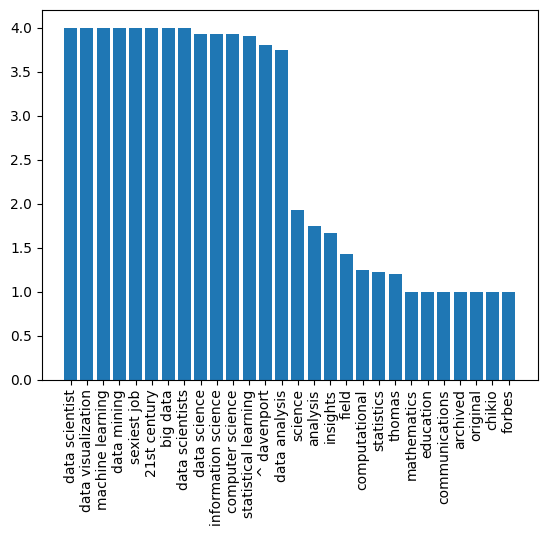

In [10]:
# Import libraries for data visualization (matplotlib)
import matplotlib.pyplot as plt

# Function to plot the extracted keyword phrases and their frequencies as a bar chart
def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation = 'vertical')
    plt.show()

# Plot the extracted keyword phrases and their frequencies
plot(res)

There is, however, even better way to visualize word frequencies - using Word Cloud. We will need to install another library to plot the word cloud from our keyword list.

In [11]:
# This section installs the wordcloud library using pip (assuming it's not already installed)
# You might need to remove this block if wordcloud is already installed in your environment
!{sys.executable} -m pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 KB 4.0 MB/s eta 0:00:00a 0:00:01


WordCloud object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using matplotlib:

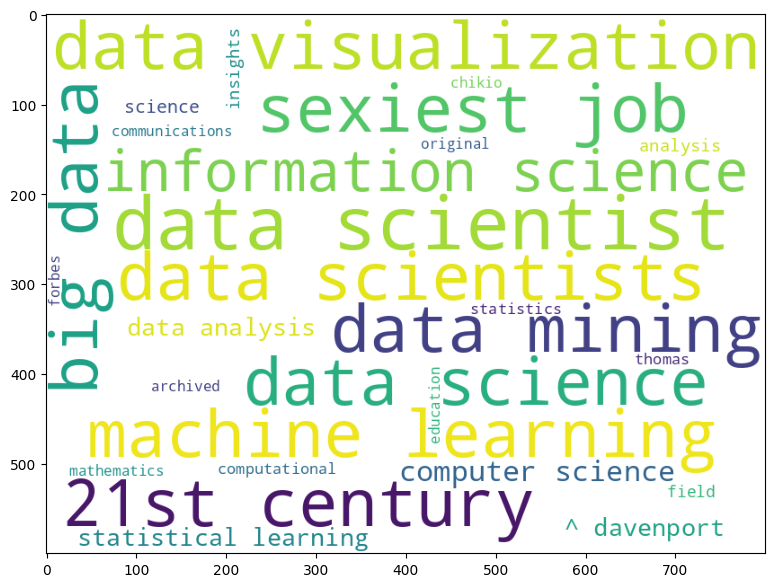

In [12]:
# Import libraries for word cloud generation
from wordcloud import WordCloud


# Create a WordCloud object with specific configurations
wc  = WordCloud(background_color='white', width=800, height=600)

# Create a new figure window with a specific size (15 inches wide, 7 inches high)
plt.figure(figsize=(15,7))

# Generate a WordCloud image based on the frequencies of the extracted keywords
plt.imshow(wc.generate_from_frequencies({k:v for k,v in res }))

We can also pass in the original text to WordCloud - let's see if we are able to get similar result:

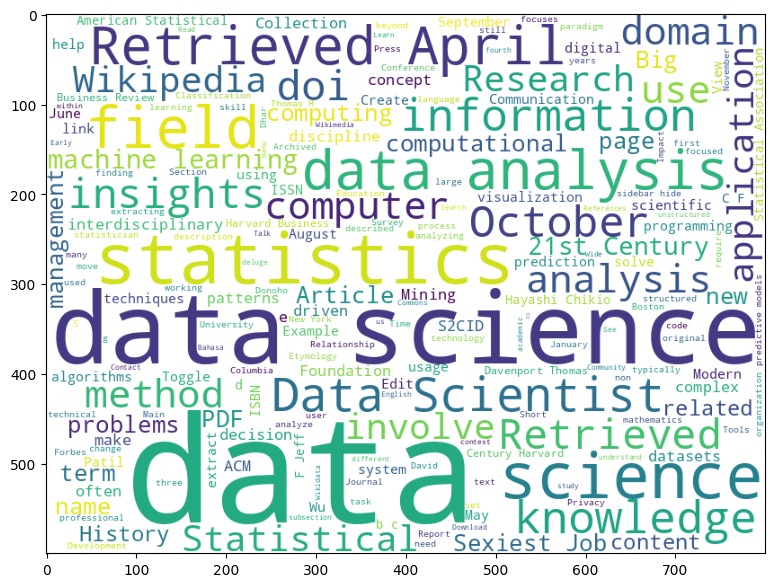

In [13]:
# Create a new figure window with a specific size (15 inches wide, 7 inches high)
plt.figure(figsize=(15,7))

# Generate a WordCloud image based on the entire processed text
plt.imshow(wc.generate(text))

In [15]:
# Saving the generated WordCloud image as a PNG file.
wc.generate(text).to_file('images/ds_wordcloud.png')

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as Retrieved on). Also, we get fewer keywords that consist of two words, such as data scientist, or computer science. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.